# Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1 

We can calculate logistic regression by adding an activation function as the final step to our linear model. 

This converts the linear regression output to a probability.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define the `jet` color map
jet = plt.cm.jet

Generate some data

In [4]:
from sklearn.datasets import make_blobs

X, z = make_blobs(centers=2, random_state=42)

print(f"Labels: {z[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[ -2.98837186   8.82862715]
 [  5.72293008   3.02697174]
 [ -3.05358035   9.12520872]
 [  5.461939     3.86996267]
 [  4.86733877   3.28031244]
 [ -2.14780202  10.55232269]
 [  4.91656964   2.80035293]
 [  3.08921541   2.04173266]
 [ -2.90130578   7.55077118]
 [ -3.34841515   8.70507375]]


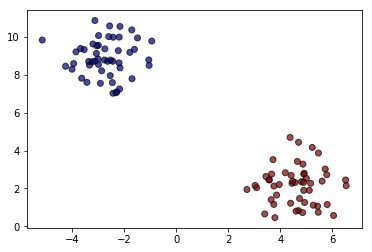

In [5]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=z, cmap=jet, alpha=0.7, edgecolors='k')

Split our data into training and testing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, z_train, z_test = train_test_split(X, z, random_state=1, stratify=z)

Create a Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Fit (train) or model using the training data

In [8]:
classifier.fit(X_train, z_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validate the model using the test data

In [9]:
print(f"Training Data Score: {classifier.score(X_train, z_train)}")
print(f"Testing Data Score: {classifier.score(X_test, z_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


Make predictions

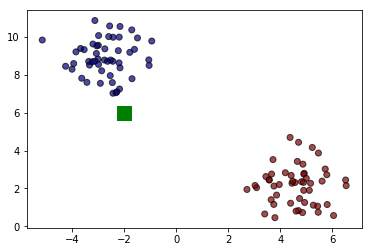

In [10]:
# Generate a new data point (the green square)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=z, cmap=jet, alpha=0.7, edgecolors='k')
plt.scatter(new_data[0, 0], new_data[0, 1], c="g", marker="s", s=200)

In [11]:
# Predict the class (blue or red) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (blue) or 1 (red)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (blue) or 1 (red)
The new point was classified as: [0]


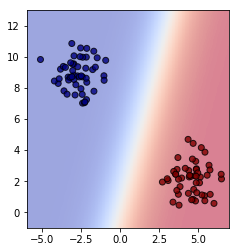

In [14]:
# Calculate and display the prediction probability for every point on a grid

xmin = -6
xmax = 7
ymin = -1
ymax = 13
step = 0.05

XV, YV = np.mgrid[xmin:xmax:step, ymin:ymax:step]
nx, ny = XV.shape

XV = XV.reshape(-1, 1)
YV = YV.reshape(-1, 1)

NEWX = np.append(XV, YV, axis=1)

NEWZ = classifier.predict_proba(NEWX)
NEWZ = NEWZ[:, 1].reshape(nx, ny)

plt.imshow(NEWZ.T, origin='lower',
           extent=[xmin, xmax, ymin, ymax],
           cmap='coolwarm', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=z, cmap=jet, alpha=0.8, edgecolors='k')

In [15]:
classifier.predict_proba(new_data)

array([[ 0.98855668,  0.01144332]])